In [2]:
import pandas as pd
import numpy as np
import math
import time
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [3]:
df = pd.read_csv('CardTransactions.csv')
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


                                distance_from_home  \
distance_from_home                        1.000000   
distance_from_last_transaction            0.000193   
ratio_to_median_purchase_price           -0.001374   
repeat_retailer                           0.143124   
used_chip                                -0.000697   
used_pin_number                          -0.001622   
online_order                             -0.001301   
fraud                                     0.187571   

                                distance_from_last_transaction  \
distance_from_home                                    0.000193   
distance_from_last_transaction                        1.000000   
ratio_to_median_purchase_price                        0.001013   
repeat_retailer                                      -0.000928   
used_chip                                             0.002055   
used_pin_number                                      -0.000899   
online_order                                       

<AxesSubplot:>

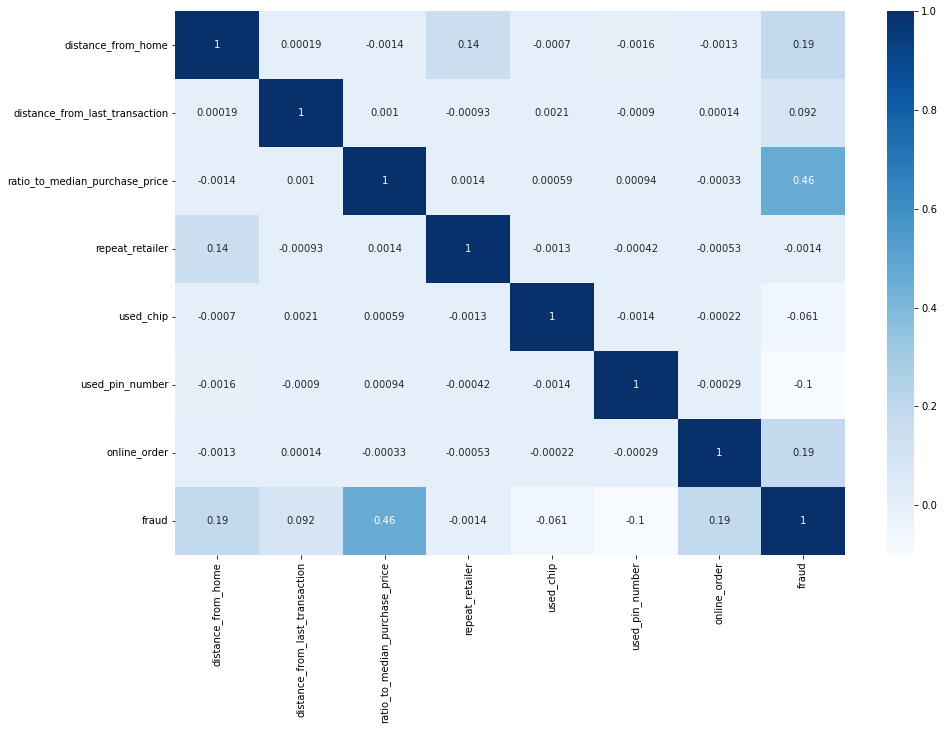

In [19]:
cor = df.corr()
print(cor)
plt.figure(figsize= (15,10))
sb.heatmap(cor, annot=True, cmap="Blues")

<AxesSubplot:xlabel='online_order', ylabel='fraud'>

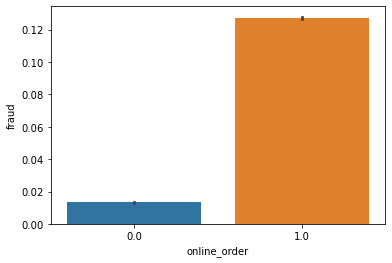

In [20]:
sb.barplot(data=df, x='online_order', y='fraud')

<AxesSubplot:xlabel='used_pin_number', ylabel='fraud'>

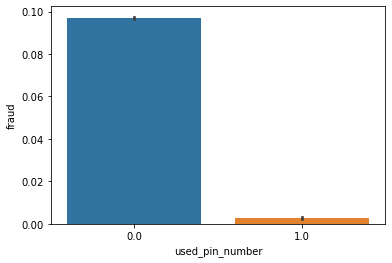

In [21]:
sb.barplot(data=df, x='used_pin_number', y='fraud')

<AxesSubplot:xlabel='used_chip', ylabel='fraud'>

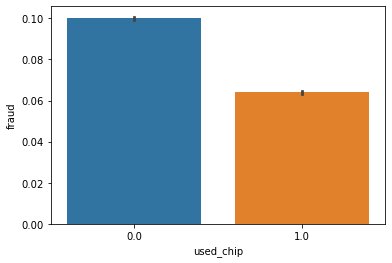

In [22]:
sb.barplot(data=df, x='used_chip', y='fraud')

<AxesSubplot:xlabel='repeat_retailer', ylabel='fraud'>

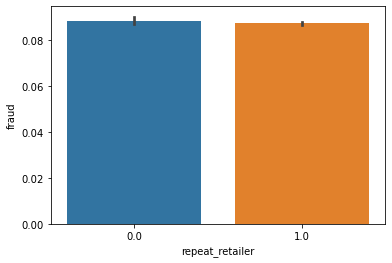

In [23]:
sb.barplot(data=df, x='repeat_retailer', y='fraud')

In [24]:
duplicates = df.duplicated()
if duplicates.any():
    print('Duplicates exist in the DataFrame')
else:
    print('No duplicates in the DataFrame')

No duplicates in the DataFrame


In [25]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
df.drop([ "repeat_retailer", "used_chip"], axis=1, inplace=True)

In [27]:

def testTrainSplit(df):
    length = len(df.index)
    splitLimit = int(length * 0.7)
    X_train = df[0: splitLimit]
    y_train = X_train['fraud']
    X_test = df[splitLimit + 1: length]
    y_test = X_test['fraud']
    return X_train, y_train, X_test, y_test

In [34]:
X_train, y_train, X_test, y_test = testTrainSplit(df)
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
print(X_train[0])

[0.31114001 1.94593998 0.         0.         0.        ]


In [44]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

distance = []
for i in range(len(X_test)):
    distance.append(euclidean_distance(X_test[i], X_train[i]))

distance.sort()
print(distance[:10])


[0.003583325794651325, 0.005210110087687075, 0.011138438909205203, 0.011239998991107829, 0.012355110138002941, 0.013689557076331283, 0.01375679698656284, 0.014183957288643745, 0.014332747262885538, 0.01481950883254153]


In [16]:
def getSegments(df):
  # Segment training data into 3 segments. If not divisible by 3, add extra data to unknown segment.
  length = len(df.index)
  splitPoint = int(length/3)
  fraud = df[df.fraud == 1]
  notfraud = df[df.fraud == 0]
  fraud = fraud.iloc[:splitPoint]
  notfraud = notfraud.iloc[:splitPoint]
  leftover = notfraud.iloc[splitPoint:]
  fraud.reset_index(inplace=True, drop=True)
  notfraud.reset_index(inplace=True, drop=True)
  leftover.reset_index(inplace=True, drop=True)
  return fraud, notfraud, leftover

In [22]:
fraud, notfraud, leftover = getSegments(df)
print(len(df))
print(len(df[df.fraud == 0]))
print(len(df[df.fraud == 1]))


1000000
912597
87403


In [32]:

def trainKNN(df, iterations):
  '''
  Pseudocode Algorithm
  1. Set K to 3 because this is the first odd value greater than the number of categories in the Titanic dataset.
  2. Create an empty list to collect accuracy values during training.
  2. Segment the training dataset into three equal parts: 
    - Segment 1: Class 1 labels
    - Segment 2: Class 2 labels
    - Segment 3: Remaining data of "unknown" labels 
  3. Calculate the euclidean distance between each data point in segment 3 with all data in segment 1 and segment 2. 
  4. Take the top K smallest distances to determine the label of the "unknown" data point.
  5. Append 0 to accuracy list if the label does not match the actual label. Append 1 to accuracy list if the label does match the actual label.
  6. Calculate the overall accuracy percent of the K value and append it to a dictionary of k, accuracy values.
  7. Add 2 to K and repeat steps 3 - 6 for a desired number of iterations.
  '''
  # Set initial value of k
  k = 3

  # Segment training data into 3 segments.
  fraud, notfraud, leftover = getSegments(df)
  
  # Calculate accuracy of K values for desired iterations
  count = 0
  accuracies = {}
  t0 = time.time() # for measuring how long it takes to compute
  t0_k = k
  while count < iterations:
    if count % 10 == 0:
      elapsed = time.time() - t0
      t0 = time.time()
      print(f"Took {elapsed:.2f} seconds to compute {t0_k}<=k<{k}")
      t0_k = k
    # Calculate percent accuracy for current k
    accuracy_at_k = calculateAccuracy(fraud, notfraud, leftover, k)
    accuracies[k] = accuracy_at_k
    k = k + 2
    count = count + 1
  
  return accuracies

In [33]:
# Example usaaage
"""X_train = np.array([[1, 2], [2, 1], [2, 3], [3, 2]])
y_train = np.array([0, 0, 1, 1])
X_test = np.array([[1, 1], [3, 3]])"""

knn = KNN(k=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print(predictions)  # Output: [0, 1]


KeyError: 0